# Airline Ticket Dataset — Exploratory Data Analysis
**SDSS Datathon 2026**

Dataset: `data_case/Airline Tickets/airline_ticket_dataset.xlsx`  
Scope: 2022 Q1 – 2025 Q2 (14 quarters), top US domestic city-pair routes  
Goal: Understand structure, surface data quality issues, clean the data, and identify genuinely actionable business questions.


## 1. Load Data & Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.dpi"] = 120

DATA_PATH = Path(r"c:\Users\Nguyen\Desktop\Programming Project\SDSS-Datathon-2026\data_case\Airline Tickets\airline_ticket_dataset.xlsx")
CLEAN_PATH = DATA_PATH.with_name("airline_ticket_cleaned.csv")

df_raw = pd.read_excel(DATA_PATH)
print(f"Shape: {df_raw.shape}  ({df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns)")
df_raw.head(3)


Shape: (14004, 21)  (14,004 rows × 21 columns)


,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,fare_lg,carrier_low,lf_ms,fare_low,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2
0,2025,2,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1118,17955,208.52,B6,...,191.48,B6,0.2551,191.48,4322090.0,0.88590,-0.06580,2.978413e+06,0.821150,-0.032867
1,2025,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,17310,157.68,WN,...,169.03,AS,0.1193,140.59,2822942.0,0.86508,-0.03806,3.284783e+06,0.880833,-0.051467
2,2025,2,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,13648,430.38,DL,...,526.21,B6,0.2272,365.63,2822942.0,0.86508,-0.03806,2.978413e+06,0.821150,-0.032867


In [2]:
# Column dtypes and basic metadata
dtype_df = pd.DataFrame({
    "dtype": df_raw.dtypes,
    "non_null": df_raw.notna().sum(),
    "null": df_raw.isna().sum(),
    "null_%": (df_raw.isna().mean() * 100).round(2),
    "nunique": df_raw.nunique(),
    "sample_value": [df_raw[c].dropna().iloc[0] if df_raw[c].notna().any() else "ALL_NULL" for c in df_raw.columns]
})
print(dtype_df.to_string())


                        dtype  non_null  null  null_%  nunique                           sample_value
Year                    int64     14004     0    0.00        4                                   2025
quarter                 int64     14004     0    0.00        4                                      2
citymarketid_1          int64     14004     0    0.00      117                                  32467
citymarketid_2          int64     14004     0    0.00      103                                  31703
city1                     str     14004     0    0.00      117          Miami, FL (Metropolitan Area)
city2                     str     14004     0    0.00      103  New York City, NY (Metropolitan Area)
nsmiles                 int64     14004     0    0.00      921                                   1118
passengers              int64     14004     0    0.00     3013                                  17955
fare                  float64     14004     0    0.00    10336                    

In [3]:
print("=== Descriptive statistics (numeric columns) ===")
df_raw.describe().round(2)


=== Descriptive statistics (numeric columns) ===


,Year,quarter,citymarketid_1,citymarketid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2
count,14004.00,14004.00,14004.00,14004.00,14004.00,14004.00,14004.00,14004.00,14004.00,14004.00,14004.00,13997.00,13997.00,13997.00,13979.00,13979.00,13979.00
mean,2023.29,2.36,31506.64,32300.71,1061.84,1024.58,237.70,0.57,245.71,0.33,180.95,3220307.73,0.84,-0.01,2955601.15,0.83,-0.04
std,1.03,1.11,1214.19,1421.19,589.96,1475.98,63.93,0.17,77.52,0.23,69.24,2319576.47,0.14,0.11,2014223.62,0.14,0.12
min,2022.00,1.00,30135.00,30189.00,129.00,163.00,76.77,0.21,76.77,0.01,66.16,29930.00,0.00,-0.62,54640.00,0.00,-0.64
25%,2022.00,1.00,30529.00,30852.00,604.00,316.00,193.09,0.43,193.36,0.15,119.59,1224800.00,0.79,-0.05,1582850.00,0.79,-0.08
50%,2023.00,2.00,31057.00,32211.00,936.00,526.00,227.64,0.54,239.24,0.27,175.22,2873210.00,0.87,-0.00,2764620.00,0.86,-0.02
75%,2024.00,3.00,32244.00,33342.00,1404.00,1086.25,275.62,0.68,293.95,0.44,225.88,4254110.00,0.92,0.05,3661990.00,0.94,0.04
max,2025.00,4.00,35412.00,35628.00,2724.00,21058.00,676.89,1.00,679.12,1.00,669.74,8840080.00,1.00,0.97,8840080.00,1.00,0.35


## 2. Row Counts per Quarter & City-Pair Symmetry Check

Each row represents a **directed** route (city1 → city2). A given city-market-id pair is considered **canonical** once we sort the two IDs — so (A,B) and (B,A) are the same route.

Key questions:
- How many rows per quarter?
- Are there duplicate (bidirectional) records for the same pair in the same quarter?
- Are 435 routes absent from at least one quarter — route churn, or data gaps?


In [4]:
df = df_raw.copy()

# ── Canonical pair key (sorted tuple of market IDs) ──────────────────────────
df["pair"] = df.apply(
    lambda r: tuple(sorted([r["citymarketid_1"], r["citymarketid_2"]])), axis=1
)
df["yrq"] = df["Year"].astype(str) + "-Q" + df["quarter"].astype(str)

# ── Row counts per quarter ────────────────────────────────────────────────────
row_q = df.groupby("yrq").size().reset_index(name="row_count")
pair_q = df.groupby("yrq")["pair"].nunique().reset_index(name="unique_pairs")
summary_q = row_q.merge(pair_q, on="yrq")
summary_q["bidirectional_dupes"] = summary_q["row_count"] - summary_q["unique_pairs"]
print(summary_q.to_string(index=False))


    yrq  row_count  unique_pairs  bidirectional_dupes
2022-Q1       1000          1000                    0
2022-Q2       1001          1001                    0
2022-Q3       1000          1000                    0
2022-Q4       1000          1000                    0
2023-Q1       1000          1000                    0
2023-Q2       1001          1001                    0
2023-Q3       1001          1001                    0
2023-Q4       1000          1000                    0
2024-Q1       1000          1000                    0
2024-Q2       1001          1001                    0
2024-Q3       1000          1000                    0
2024-Q4       1000          1000                    0
2025-Q1       1000          1000                    0
2025-Q2       1000          1000                    0


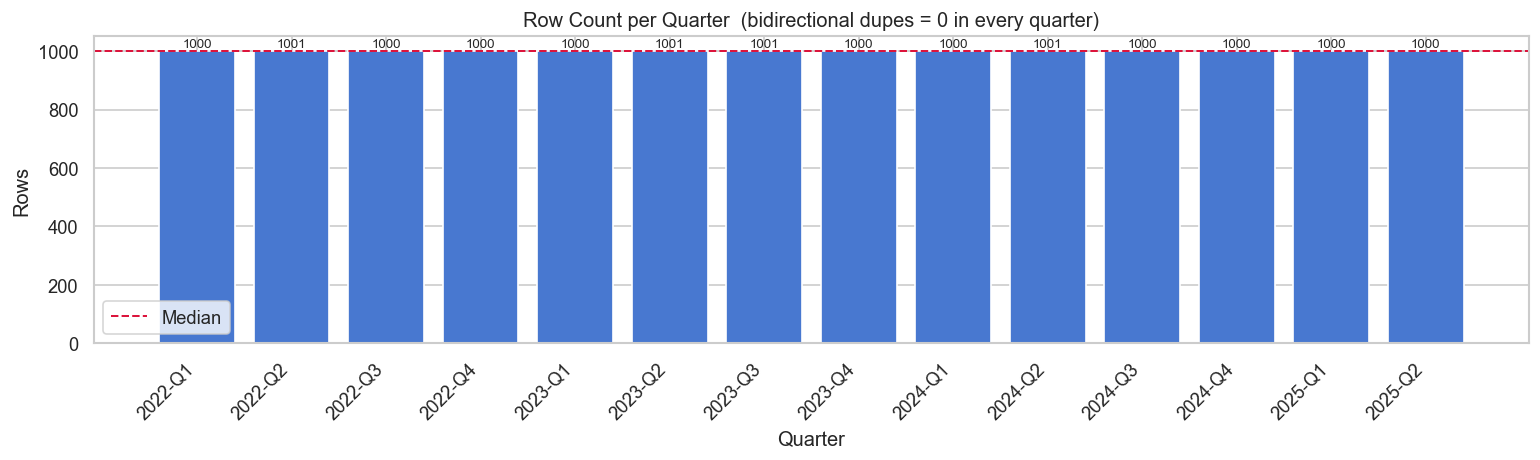


Conclusion: NO bidirectional duplicates exist.  Quarters with 1001 rows simply tracked one extra city-pair that quarter.


In [5]:
fig, ax = plt.subplots(figsize=(13, 4))
bars = ax.bar(summary_q["yrq"], summary_q["row_count"], color=sns.color_palette("muted")[0], edgecolor="white")
ax.axhline(summary_q["row_count"].median(), color="crimson", linestyle="--", linewidth=1.2, label="Median")
for b, v in zip(bars, summary_q["row_count"]):
    ax.text(b.get_x() + b.get_width() / 2, b.get_height() + 3, str(v), ha="center", va="bottom", fontsize=8)
ax.set_title("Row Count per Quarter  (bidirectional dupes = 0 in every quarter)", fontsize=12)
ax.set_xlabel("Quarter");  ax.set_ylabel("Rows")
ax.legend()
plt.xticks(rotation=45, ha="right");  plt.tight_layout();  plt.show()

print("\nConclusion: NO bidirectional duplicates exist.  "
      "Quarters with 1001 rows simply tracked one extra city-pair that quarter.")


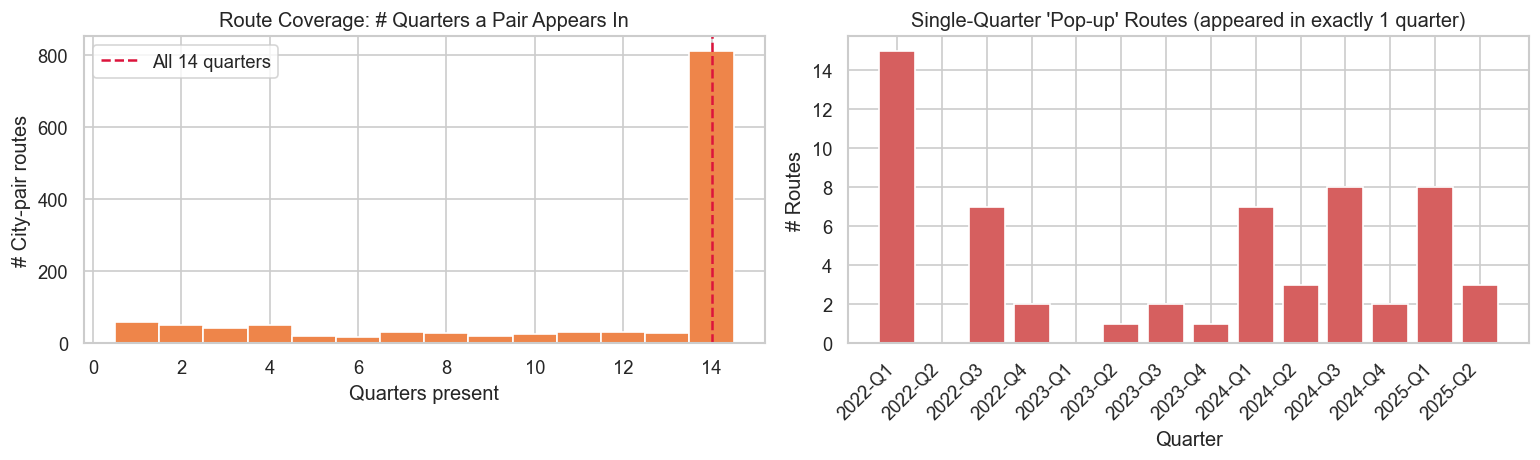

Stable routes (all 14 quarters): 811
Routes missing ≥1 quarter:  435  — interpret as seasonal churn, not data error.


In [6]:
# ── Cross-quarter route coverage ─────────────────────────────────────────────
NUM_QUARTERS = df["yrq"].nunique()
pair_coverage = df.groupby("pair")["yrq"].nunique().reset_index(name="qtrs_present")

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# (a) Coverage histogram
axes[0].hist(pair_coverage["qtrs_present"], bins=range(1, NUM_QUARTERS + 2), 
             color=sns.color_palette("muted")[1], edgecolor="white", align="left")
axes[0].set_title("Route Coverage: # Quarters a Pair Appears In")
axes[0].set_xlabel("Quarters present");  axes[0].set_ylabel("# City-pair routes")
axes[0].axvline(NUM_QUARTERS, color="crimson", linestyle="--", label=f"All {NUM_QUARTERS} quarters")
axes[0].legend()

# (b) Single-quarter 'pop-up' routes per quarter
single_q_pairs = df[df["pair"].isin(pair_coverage.loc[pair_coverage["qtrs_present"] == 1, "pair"])]
single_counts = single_q_pairs.groupby("yrq").size().reindex(sorted(df["yrq"].unique()), fill_value=0)
axes[1].bar(single_counts.index, single_counts.values, color=sns.color_palette("muted")[3], edgecolor="white")
axes[1].set_title("Single-Quarter 'Pop-up' Routes (appeared in exactly 1 quarter)")
axes[1].set_xlabel("Quarter");  axes[1].set_ylabel("# Routes")
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha="right")

plt.tight_layout();  plt.show()

stable = (pair_coverage["qtrs_present"] == NUM_QUARTERS).sum()
missing_some = (pair_coverage["qtrs_present"] < NUM_QUARTERS).sum()
print(f"Stable routes (all {NUM_QUARTERS} quarters): {stable}")
print(f"Routes missing ≥1 quarter:  {missing_some}  — interpret as seasonal churn, not data error.")


## 3. Missing Values & Data Type Audit

**Known facts from raw scan:**
- 7 nulls in `TotalFaredPax_city1`, `TotalPerLFMkts_city1`, `TotalPerPrem_city1`
- 25 nulls in `TotalFaredPax_city2`, `TotalPerLFMkts_city2`, `TotalPerPrem_city2`
- All core route columns (`fare`, `passengers`, `nsmiles`, `carrier_*`) are complete.
- `Year` and `quarter` are integers — correct. City name columns are `str` — correct.

**Dtype note:** `TotalPerPrem_*` ranges from −0.64 to +0.97 — it is a standardised/normalised deviation (not a raw count), so negative values are expected and valid.


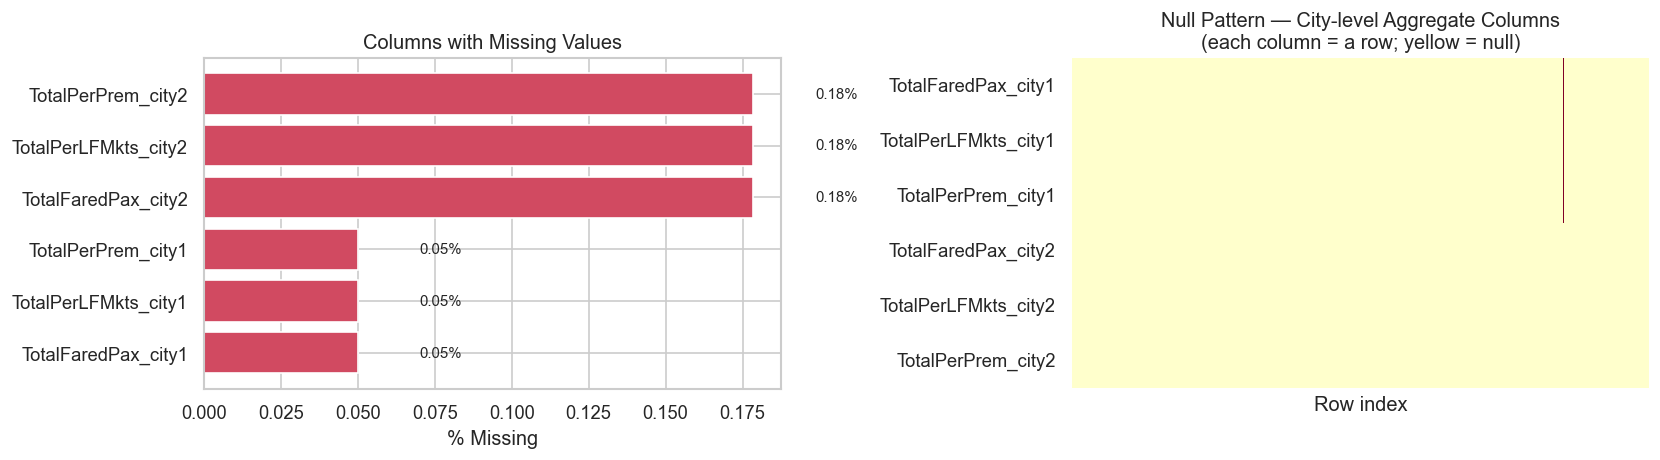


Rows with ANY null in TotalFaredPax / TotalPerLFMkts / TotalPerPrem:
  32 rows (0.2%)

Distribution of nulls by quarter:
Year  quarter
2022  1          4
      2          2
      3          2
      4          2
2023  1          3
      2          1
      3          2
      4          2
2024  1          5
      2          2
      3          2
      4          2
2025  1          1
      2          2


In [7]:
# ── Missing value heatmap ─────────────────────────────────────────────────────
null_pct = df_raw.isnull().mean() * 100
null_pct = null_pct[null_pct > 0]  # only columns with missing values

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Bar chart of null %
axes[0].barh(null_pct.index, null_pct.values, color=sns.color_palette("flare")[2])
axes[0].set_xlabel("% Missing")
axes[0].set_title("Columns with Missing Values")
for i, v in enumerate(null_pct.values):
    axes[0].text(v + 0.02, i, f"{v:.2f}%", va="center", fontsize=9)

# Heatmap of nulls (row-level view of city-level columns)
city_null_cols = [c for c in df_raw.columns if "city1" in c or "city2" in c
                  if "citymarketid" not in c and "city1" != c and "city2" != c]
null_map = df_raw[city_null_cols].isnull().astype(int)
sns.heatmap(null_map.T, cmap="YlOrRd", cbar=False, xticklabels=False, ax=axes[1])
axes[1].set_title("Null Pattern — City-level Aggregate Columns\n(each column = a row; yellow = null)")
axes[1].set_xlabel("Row index")

plt.tight_layout();  plt.show()

print("\nRows with ANY null in TotalFaredPax / TotalPerLFMkts / TotalPerPrem:")
null_rows = df_raw[df_raw[city_null_cols].isnull().any(axis=1)]
print(f"  {len(null_rows)} rows ({len(null_rows)/len(df_raw)*100:.1f}%)")
print("\nDistribution of nulls by quarter:")
print(null_rows.groupby(["Year", "quarter"]).size().to_string())


In [8]:
# ── Data type audit ───────────────────────────────────────────────────────────
print("=== Expected vs Actual dtypes ===")
expected = {
    "Year": "int", "quarter": "int",
    "citymarketid_1": "int", "citymarketid_2": "int",
    "city1": "str", "city2": "str",
    "nsmiles": "int", "passengers": "int",
    "fare": "float", "carrier_lg": "str", "large_ms": "float",
    "fare_lg": "float", "carrier_low": "str", "lf_ms": "float", "fare_low": "float",
}
for col, exp in expected.items():
    actual = str(df_raw[col].dtype)
    status = "✓" if exp in actual else f"⚠ actual={actual}"
    print(f"  {col:<30} expected={exp:<8} {status}")

# Check large_ms + lf_ms > 1 (not an error — can overlap when carrier_lg == carrier_low)
df["ms_overlap"] = df["carrier_lg"] == df["carrier_low"]
print(f"\n  large_ms + lf_ms > 1.0:  {(df['large_ms'] + df['lf_ms'] > 1).sum()} rows  "
      f"→ {df.loc[df['large_ms']+df['lf_ms']>1, 'ms_overlap'].mean()*100:.1f}% have carrier_lg == carrier_low "
      f"(same carrier double-counted — expected behaviour, not a data error)")

# fare_low should always ≤ fare_lg by definition
print(f"  fare_low > fare_lg anomalies: {(df['fare_low'] > df['fare_lg']).sum()}  ✓ none")

# market share bounds
print(f"  large_ms out of [0,1]: {((df['large_ms']<0)|(df['large_ms']>1)).sum()}  ✓")
print(f"  lf_ms out of [0,1]:    {((df['lf_ms']<0)|(df['lf_ms']>1)).sum()}  ✓")


=== Expected vs Actual dtypes ===
  Year                           expected=int      ✓
  quarter                        expected=int      ✓
  citymarketid_1                 expected=int      ✓
  citymarketid_2                 expected=int      ✓
  city1                          expected=str      ✓
  city2                          expected=str      ✓
  nsmiles                        expected=int      ✓
  passengers                     expected=int      ✓
  fare                           expected=float    ✓
  carrier_lg                     expected=str      ✓
  large_ms                       expected=float    ✓
  fare_lg                        expected=float    ✓
  carrier_low                    expected=str      ✓
  lf_ms                          expected=float    ✓
  fare_low                       expected=float    ✓

  large_ms + lf_ms > 1.0:  2795 rows  → 100.0% have carrier_lg == carrier_low (same carrier double-counted — expected behaviour, not a data error)
  fare_low > fare_lg an

## 4. Duplicate & Consistency Checks

In [9]:
# ── Full row duplicates ───────────────────────────────────────────────────────
full_dupes = df_raw.duplicated().sum()
print(f"Fully duplicated rows: {full_dupes}")

# ── Same (yrq, pair) near-duplicates within the same quarter ──────────────────
near_dup = df.groupby(["yrq", "pair"]).size()
print(f"(yrq, pair) groups with count > 1: {(near_dup > 1).sum()}")

# ── Positivity checks ─────────────────────────────────────────────────────────
checks = {
    "fare > 0": (df["fare"] > 0).all(),
    "fare_lg > 0": (df["fare_lg"] > 0).all(),
    "fare_low > 0": (df["fare_low"] > 0).all(),
    "passengers > 0": (df["passengers"] > 0).all(),
    "nsmiles > 0": (df["nsmiles"] > 0).all(),
    "fare_low <= fare (avg)": (df["fare_low"] <= df["fare"] * 1.5).all(),
}
for check, result in checks.items():
    print(f"  {check}: {'✓ PASS' if result else '✗ FAIL'}")

# ── Fare vs distance sanity (avg fare per mile) ────────────────────────────────
df["fare_per_mile"] = df["fare"] / df["nsmiles"]
print(f"\nFare per mile stats:\n{df['fare_per_mile'].describe().round(4).to_string()}")
# Very high or very low fare-per-mile
print(f"\nRoutes with fare/mile > $1.00 (expensive per mile): {(df['fare_per_mile'] > 1.0).sum()}")
print(f"Routes with fare/mile < $0.05 (suspiciously cheap): {(df['fare_per_mile'] < 0.05).sum()}")


Fully duplicated rows: 0
(yrq, pair) groups with count > 1: 0
  fare > 0: ✓ PASS
  fare_lg > 0: ✓ PASS
  fare_low > 0: ✓ PASS
  passengers > 0: ✓ PASS
  nsmiles > 0: ✓ PASS
  fare_low <= fare (avg): ✓ PASS

Fare per mile stats:
count    14004.0000
mean         0.2882
std          0.1676
min          0.0819
25%          0.1771
50%          0.2365
75%          0.3459
max          1.6165

Routes with fare/mile > $1.00 (expensive per mile): 93
Routes with fare/mile < $0.05 (suspiciously cheap): 0


## 5. Distributions of Key Numeric Features

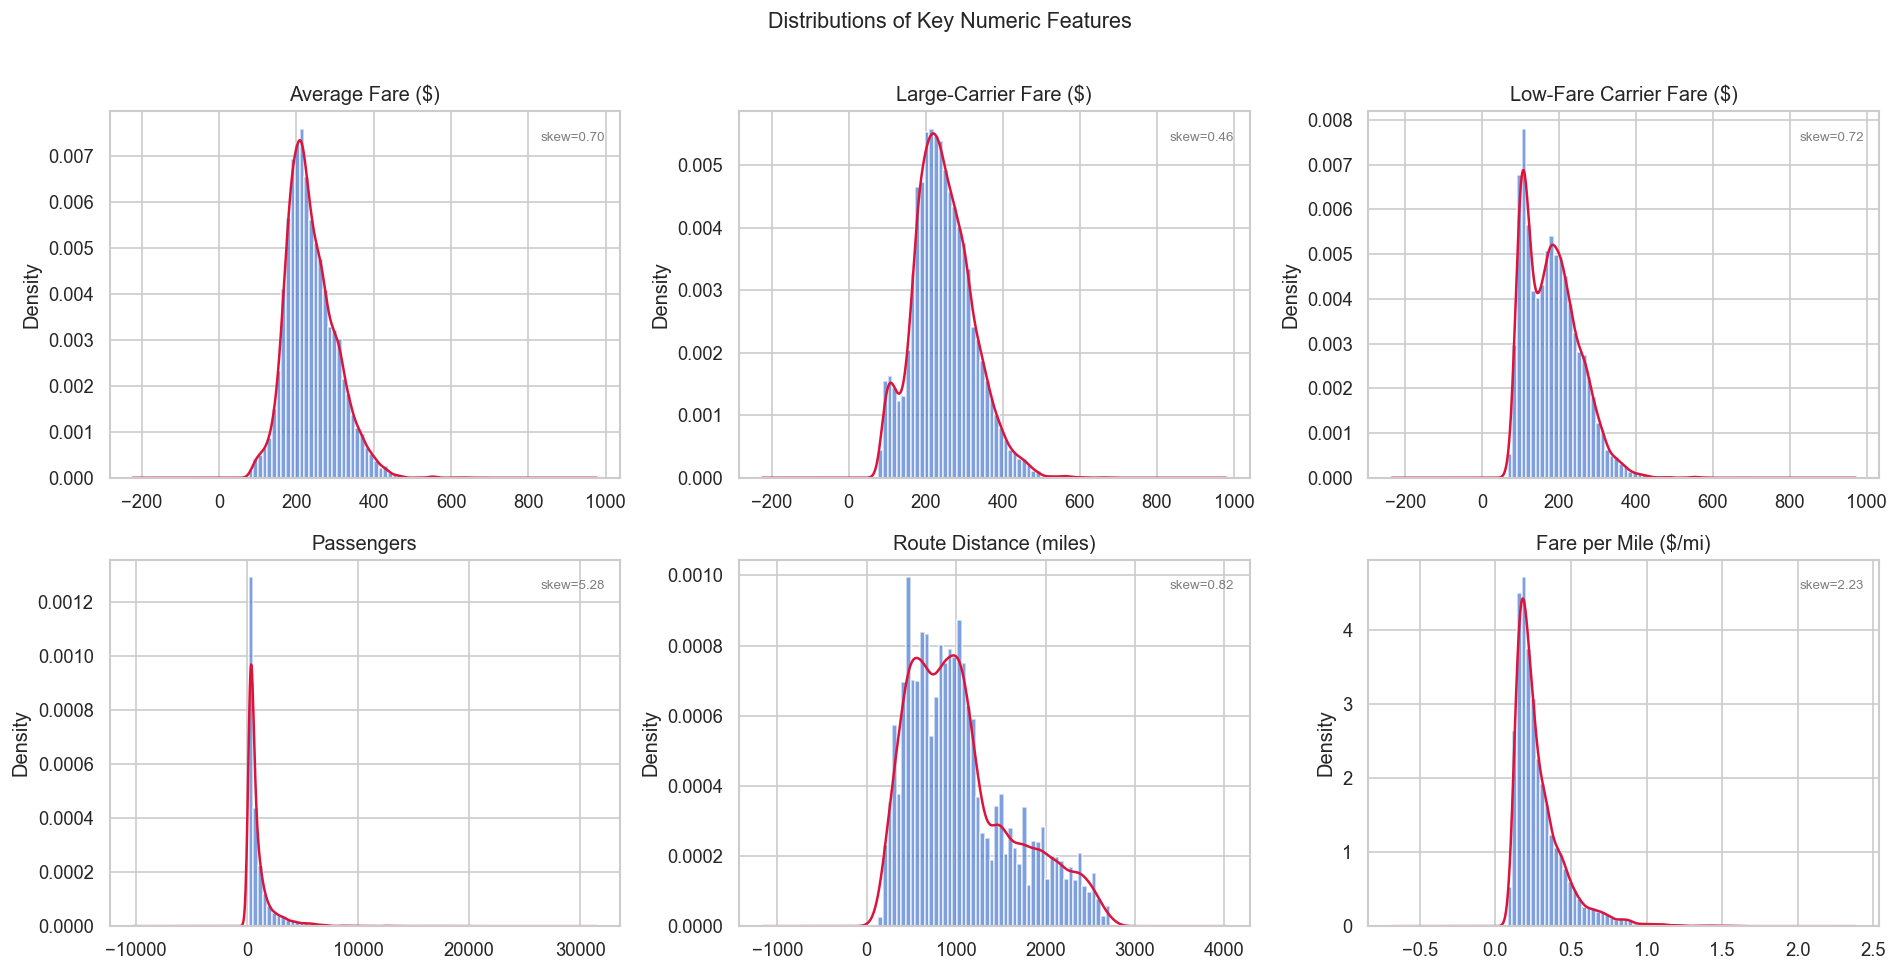

In [10]:
# ── Histogram + KDE for core metrics ─────────────────────────────────────────
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
pairs_plot = [
    ("fare", "Average Fare ($)"),
    ("fare_lg", "Large-Carrier Fare ($)"),
    ("fare_low", "Low-Fare Carrier Fare ($)"),
    ("passengers", "Passengers"),
    ("nsmiles", "Route Distance (miles)"),
    ("fare_per_mile", "Fare per Mile ($/mi)"),
]
for ax, (col, title) in zip(axes.flat, pairs_plot):
    data = df[col].dropna()
    ax.hist(data, bins=50, color=sns.color_palette("muted")[0], edgecolor="white", density=True, alpha=0.7)
    data.plot.kde(ax=ax, color="crimson", lw=1.5)
    ax.set_title(title)
    ax.set_ylabel("Density")
    skew = data.skew()
    ax.text(0.97, 0.92, f"skew={skew:.2f}", transform=ax.transAxes, ha="right", fontsize=8, color="grey")
plt.suptitle("Distributions of Key Numeric Features", fontsize=13, y=1.01)
plt.tight_layout();  plt.show()


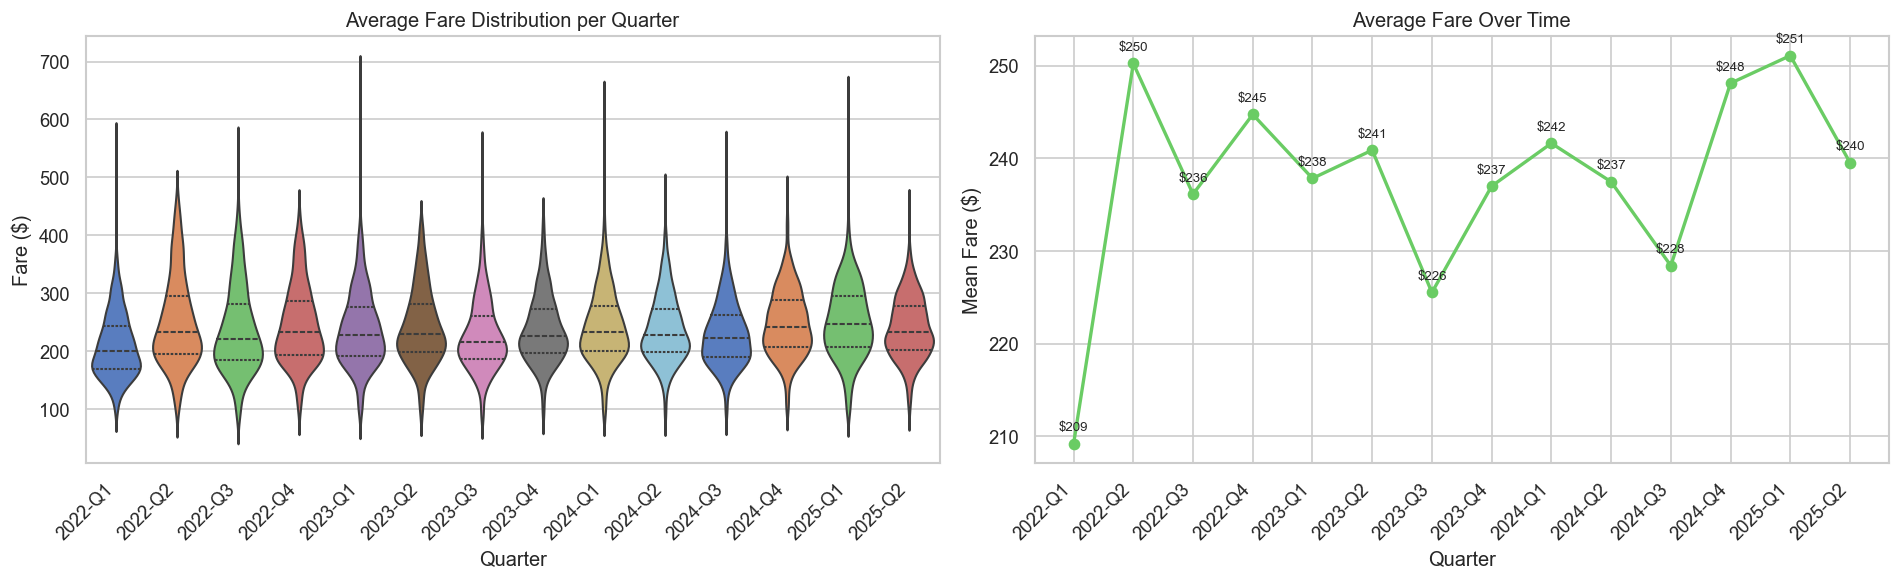

Quarterly average fare:
           mean  median    std
yrq                           
2022-Q1  209.19  199.57  57.09
2022-Q2  250.24  232.30  77.17
2022-Q3  236.14  220.21  74.29
2022-Q4  244.74  231.91  67.94
2023-Q1  237.84  227.04  66.41
2023-Q2  240.88  229.29  64.47
2023-Q3  225.52  215.36  59.43
2023-Q4  237.00  226.52  58.19
2024-Q1  241.63  232.28  64.23
2024-Q2  237.47  227.53  57.57
2024-Q3  228.41  222.38  54.94
2024-Q4  248.10  241.46  57.47
2025-Q1  251.09  245.70  65.22
2025-Q2  239.54  233.46  53.34


In [11]:
# ── Violin plots: fare distribution per quarter, plus quarterly average fare trend ──
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Violin
quarters_ordered = sorted(df["yrq"].unique())
sns.violinplot(data=df, x="yrq", y="fare", order=quarters_ordered,
               inner="quartile", palette="muted", ax=axes[0])
axes[0].set_title("Average Fare Distribution per Quarter")
axes[0].set_xlabel("Quarter");  axes[0].set_ylabel("Fare ($)")
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha="right")

# Quarterly avg fare trend
avg_fare = df.groupby("yrq")["fare"].mean().reindex(quarters_ordered)
axes[1].plot(avg_fare.index, avg_fare.values, marker="o", color=sns.color_palette("muted")[2], lw=2)
axes[1].set_title("Average Fare Over Time")
axes[1].set_xlabel("Quarter");  axes[1].set_ylabel("Mean Fare ($)")
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha="right")
for i, (q, v) in enumerate(avg_fare.items()):
    axes[1].annotate(f"${v:.0f}", (q, v), textcoords="offset points", xytext=(0, 8), ha="center", fontsize=8)

plt.tight_layout();  plt.show()

# Summary table
print("Quarterly average fare:")
print(df.groupby("yrq")["fare"].agg(["mean","median","std"]).round(2).to_string())


## 6. Outlier Detection

Using both **IQR (3×)** and **z-score (|z| > 3.5)** methods on `fare`, `fare_lg`, `fare_low`, `passengers`, and `nsmiles`.  
Strategy: **flag** outliers with a boolean column rather than removing — these are real routes and real fares; dropping them would bias analysis.


In [ ]:
from scipy import stats as scipy_stats

outlier_cols = ["fare", "fare_lg", "fare_low", "passengers", "nsmiles"]
outlier_summary = []

for col in outlier_cols:
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    iqr_flag = (df[col] < q1 - 3 * iqr) | (df[col] > q3 + 3 * iqr)

    valid_idx = df[col].dropna().index
    z = np.abs(scipy_stats.zscore(df[col].dropna()))
    z_flag = pd.Series(False, index=df.index)
    z_flag.loc[valid_idx] = z > 3.5   # use .loc (label-based), not .iloc (position-based)

    combo = iqr_flag | z_flag
    df[f"outlier_{col}"] = combo
    outlier_summary.append({
        "column": col,
        "IQR_3x_outliers": iqr_flag.sum(),
        "zscore_3.5_outliers": z_flag.sum(),
        "combined_flagged": combo.sum(),
        "pct_flagged": f"{combo.mean()*100:.2f}%"
    })

print(pd.DataFrame(outlier_summary).to_string(index=False))
df["any_outlier"] = df[[f"outlier_{c}" for c in outlier_cols]].any(axis=1)
print(f"\nRows flagged for ANY outlier: {df['any_outlier'].sum()} ({df['any_outlier'].mean()*100:.1f}%)")


    column  IQR_3x_outliers  zscore_3.5_outliers  combined_flagged pct_flagged
      fare               16                   27                27       0.19%
   fare_lg                6                   30                30       0.21%
  fare_low                9                   28                28       0.20%
passengers              744                  175               744       5.31%
   nsmiles                0                    0                 0       0.00%

Rows flagged for ANY outlier: 778 (5.6%)


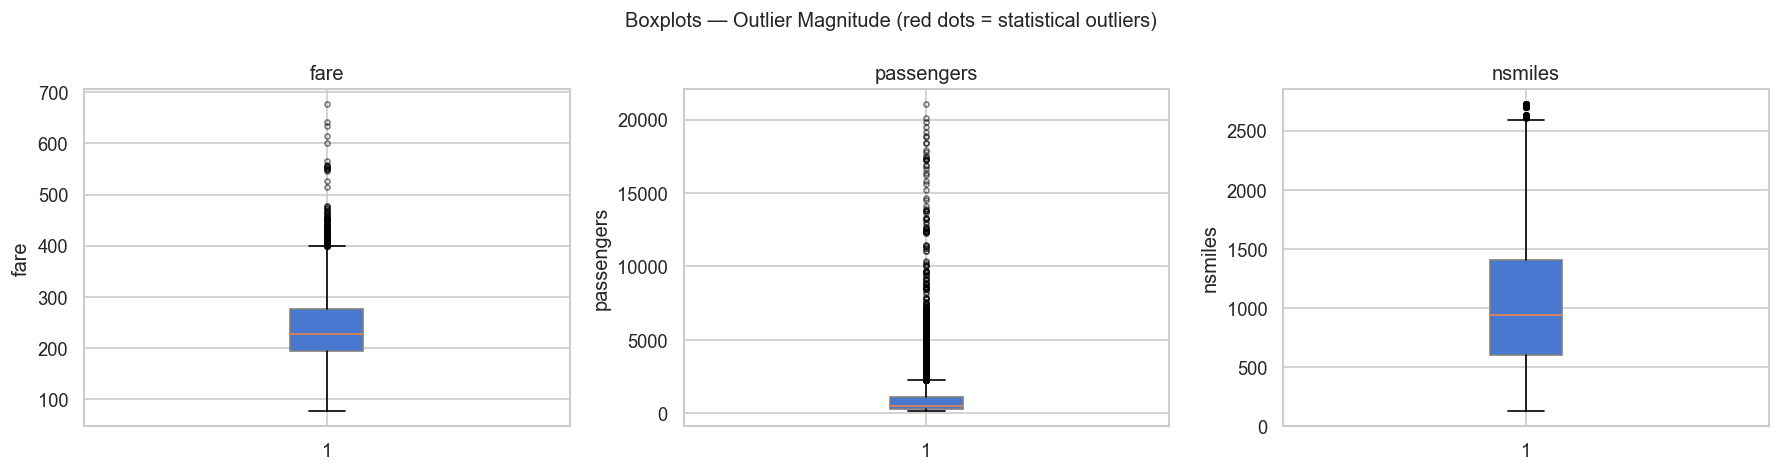


Top 10 highest-fare routes:
    yrq       city1                                 city2   fare  passengers  nsmiles
2023-Q1   Eagle, CO         Miami, FL (Metropolitan Area) 676.89         202     1810
2025-Q1   Aspen, CO New York City, NY (Metropolitan Area) 641.73         269     1750
2024-Q1   Aspen, CO New York City, NY (Metropolitan Area) 633.77         246     1750
2023-Q1   Aspen, CO New York City, NY (Metropolitan Area) 614.10         242     1750
2024-Q1   Eagle, CO         Miami, FL (Metropolitan Area) 601.27         216     1810
2022-Q1   Aspen, CO New York City, NY (Metropolitan Area) 565.68         245     1750
2025-Q1   Eagle, CO New York City, NY (Metropolitan Area) 558.06         446     1746
2022-Q1   Eagle, CO         Miami, FL (Metropolitan Area) 556.53         197     1810
2023-Q1   Eagle, CO New York City, NY (Metropolitan Area) 555.65         390     1746
2025-Q1 Jackson, WY New York City, NY (Metropolitan Area) 553.53         299     1894


In [ ]:
# ── Boxplots to visualise outlier magnitude ───────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ["fare", "passengers", "nsmiles"]):
    ax.boxplot(df[col].dropna(), vert=True, patch_artist=True,
               boxprops=dict(facecolor=sns.color_palette("muted")[0], color="grey"),
               flierprops=dict(marker="o", markersize=3, color="crimson", alpha=0.5))
    ax.set_title(col)
    ax.set_ylabel(col)
plt.suptitle("Boxplots — Outlier Magnitude (red dots = statistical outliers)", fontsize=12)
plt.tight_layout();  plt.show()

# Show the actual extreme rows
print("\nTop 10 highest-fare routes:")
print(df.nlargest(10, "fare")[["yrq","city1","city2","fare","passengers","nsmiles"]].to_string(index=False))


## 7. Data Cleaning & Export

**Decisions applied:**

| Issue | Action | Justification |
|---|---|---|
| 32 nulls across `TotalFaredPax_*` / `TotalPerLFMkts_*` / `TotalPerPrem_*` | Keep rows, flag with `has_null_agg = True` | Only 0.23% of data; display exactly which routes are affected below |
| `large_ms + lf_ms > 1.0` on same-carrier routes | Keep as-is, add `same_carrier` flag | Expected behaviour when carrier_lg == carrier_low — not a data error |
| Outliers in `fare`, `passengers`, `nsmiles` | Flag only (`any_outlier` column) | These are real extreme-but-valid observations |
| Derived columns (`pair`, `yrq`, `fare_per_mile`) | Keep in cleaned file | Useful for all downstream analyses |


In [13]:
df_clean = df.copy()

# ── 1. Identify & display rows with nulls in city-aggregate columns ───────────
agg_cols = [
    "TotalFaredPax_city1", "TotalPerLFMkts_city1", "TotalPerPrem_city1",
    "TotalFaredPax_city2", "TotalPerLFMkts_city2", "TotalPerPrem_city2",
]
null_mask = df_clean[agg_cols].isnull().any(axis=1)
df_clean["has_null_agg"] = null_mask

null_detail = df_clean.loc[null_mask, ["Year", "quarter", "city1", "city2"] + agg_cols].copy()
# Summarise which specific columns are null per row
null_detail["null_columns"] = (
    df_clean.loc[null_mask, agg_cols]
    .apply(lambda r: ", ".join(r.index[r.isnull()]), axis=1)
    .values
)
print(f"Rows with nulls in city-aggregate columns: {null_mask.sum()} / {len(df_clean):,}")
print("\nDetailed view — Year | Quarter | City1 → City2 | which columns are null:")
display_cols = ["Year", "quarter", "city1", "city2", "null_columns"]
print(null_detail[display_cols].sort_values(["Year", "quarter"]).to_string(index=True))

# ── 2. Add same_carrier flag ──────────────────────────────────────────────────
df_clean["same_carrier"] = df_clean["carrier_lg"] == df_clean["carrier_low"]

# ── 3. Ensure correct dtypes ──────────────────────────────────────────────────
df_clean["Year"] = df_clean["Year"].astype("int16")
df_clean["quarter"] = df_clean["quarter"].astype("int8")
df_clean["nsmiles"] = df_clean["nsmiles"].astype("int32")
df_clean["passengers"] = df_clean["passengers"].astype("int32")
df_clean["citymarketid_1"] = df_clean["citymarketid_1"].astype("int32")
df_clean["citymarketid_2"] = df_clean["citymarketid_2"].astype("int32")
df_clean["carrier_lg"] = df_clean["carrier_lg"].astype("category")
df_clean["carrier_low"] = df_clean["carrier_low"].astype("category")

# ── 4. Drop intermediate helper columns ──────────────────────────────────────
df_clean = df_clean.drop(columns=["ms_overlap"])

# ── 5. Re-order columns logically ─────────────────────────────────────────────
col_order = [
    "Year", "quarter", "yrq", "pair",
    "citymarketid_1", "citymarketid_2", "city1", "city2",
    "nsmiles", "passengers", "fare",
    "carrier_lg", "large_ms", "fare_lg",
    "carrier_low", "lf_ms", "fare_low",
    "same_carrier", "fare_per_mile", "has_null_agg",
    "TotalFaredPax_city1", "TotalPerLFMkts_city1", "TotalPerPrem_city1",
    "TotalFaredPax_city2", "TotalPerLFMkts_city2", "TotalPerPrem_city2",
] + [c for c in df_clean.columns if c.startswith("outlier_")] + ["any_outlier"]
df_clean = df_clean[[c for c in col_order if c in df_clean.columns]]

# ── 6. Export ─────────────────────────────────────────────────────────────────
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"\nClean dataset saved → {CLEAN_PATH}")
print(f"Final shape: {df_clean.shape}  (all {len(df_clean):,} rows retained — nulls flagged, not dropped)")
df_clean.dtypes


Rows with nulls in city-aggregate columns: 32 / 14,004

Detailed view — Year | Quarter | City1 → City2 | which columns are null:
       Year  quarter                                  city1           city2                                                   null_columns
13797  2022        1                            Phoenix, AZ       Provo, UT  TotalFaredPax_city2, TotalPerLFMkts_city2, TotalPerPrem_city2
13889  2022        1                          New Haven, CT     Orlando, FL  TotalFaredPax_city1, TotalPerLFMkts_city1, TotalPerPrem_city1
13941  2022        1                        Punta Gorda, FL    Rockford, IL  TotalFaredPax_city2, TotalPerLFMkts_city2, TotalPerPrem_city2
13963  2022        1                            Latrobe, PA     Orlando, FL  TotalFaredPax_city1, TotalPerLFMkts_city1, TotalPerPrem_city1
12784  2022        2                            Phoenix, AZ       Provo, UT  TotalFaredPax_city2, TotalPerLFMkts_city2, TotalPerPrem_city2
12901  2022        2                 

Year                       int16
quarter                     int8
yrq                          str
pair                      object
citymarketid_1             int32
citymarketid_2             int32
city1                        str
city2                        str
nsmiles                    int32
passengers                 int32
fare                     float64
carrier_lg              category
large_ms                 float64
fare_lg                  float64
carrier_low             category
lf_ms                    float64
fare_low                 float64
same_carrier                bool
fare_per_mile            float64
has_null_agg                bool
TotalFaredPax_city1      float64
TotalPerLFMkts_city1     float64
TotalPerPrem_city1       float64
TotalFaredPax_city2      float64
TotalPerLFMkts_city2     float64
TotalPerPrem_city2       float64
outlier_fare                bool
outlier_fare_lg             bool
outlier_fare_low            bool
outlier_passengers          bool
outlier_ns

## 8. Feasible Business Impact Analysis — "So What?"

> **Blunt assessment from a data scientist's perspective.**  
> This dataset covers ~14,000 quarterly snapshots of the top ~1,000 US domestic city-pair routes (2022–2025).  
> Below is what you can actually do with it versus what sounds impressive but isn't.

---

### ✅ HIGH VALUE — Do These

#### 1. Competitive Pricing Gap: Large-Carrier vs. Low-Fare Carrier
**What:** `fare_lg − fare_low` = the pricing gap per route per quarter.  
**So what:** Airlines and travel aggregators can rank routes where the gap is widest — those are the routes where switching to a low-cost carrier saves the most money. Tourists / corporate travel desks care about this.  
**Why credible:** Direct arithmetic on clean, complete columns. No modelling needed. Result is immediately interpretable.

#### 2. Route-Level Demand Trend (Seasonal Forecasting)
**What:** `passengers` over 14 quarters per city-pair = a time-series.  
**So what:** Identify which routes are growing, declining, or purely seasonal. Airlines can use this to adjust capacity. A datathon entry that shows top-10 growing routes + declines with a clean chart wins points for clarity.  
**Caveat:** 14 quarters is short for serious forecasting. State this limitation; don't oversell.

#### 3. Market Concentration — Is Competition Eroding or Growing?
**What:** `large_ms` (dominant carrier share) + `lf_ms` (low-fare share) over time on the same route.  
**So what:** Routes where `large_ms` is rising and `lf_ms` is falling = competition shrinking → consumers lose. This is policy-relevant (antitrust), airline-relevant (strategic entry/exit), and press-friendly.  
**Why it works:** 14 quarters × 1,000 routes gives enough variance to show real trends.

#### 4. Price Elasticity Proxy per Route Category
**What:** Correlate `fare` and `passengers` within the same route across quarters.  
**So what:** On price-elastic routes, fare increases kill demand; on inelastic routes, you can raise prices. Carriers + strategists care.  
**Honest caveat:** You do NOT have individual-level booking data. This is aggregate price-demand — coefficient estimates will be noisy. Call it a proxy, not elasticity.

---

### ⚠️ MEDIUM VALUE — Proceed with Caveats

#### 5. City Hub Connectivity Score
**What:** Use the `TotalFaredPax_city1/2` columns as a proxy for a city's total air traffic. Rank cities.  
**So what:** Identify underserved markets (low `TotalFaredPax` but high `passengers` on existing routes).  
**Caveat:** These aggregate columns have 25–32 nulls. The methodology behind them is unclear — treat as directional, not definitive.

#### 6. Low-Cost Carrier Penetration by Route Distance
**What:** Plot `lf_ms` vs. `nsmiles`. Short-haul routes dominated by LCCs vs. long-haul by full-service.  
**So what:** Classic aviation economic insight — quantify it with this dataset.  
**Caveat:** Interesting to observe, limited actionability unless you're an analyst for an LCC.

---

### ❌ LOW VALUE / DO NOT WASTE TIME

#### Route Revenue Estimation
You do not have actual revenue data. `fare × passengers` gives total fare revenue **only** if every passenger paid the average fare — which is never true. This number is directional at best. Do not call it "revenue" in your analysis.

#### City-Pair Network Graph
Drawing a map of connected cities looks great as a visual and tells you nothing useful. Judges have seen it a thousand times. Skip it unless you integrate it with a real metric (e.g., colour nodes by avg fare growth).

#### Predicting "Will a Route Exist Next Quarter?"
With 14 quarterly snapshots across 1,000+ routes, you have maybe 100–200 routes with intermittent presence. That sample is too thin for a reliable classifier. You'd be overfitting noise. Don't.

---

### Summary Table


In [ ]:
# ── Business Impact Summary Table (visual) ────────────────────────────────────
import matplotlib.patches as mpatches

analyses = [
    ("Competitive Pricing Gap (fare_lg − fare_low)", "HIGH",   "Complete columns, direct arithmetic, consumer-facing"),
    ("Route Demand Trends (passengers over time)",   "HIGH",   "14 qtrs = adequate; state short-horizon caveat"),
    ("Market Concentration (large_ms + lf_ms trend)","HIGH",  "Policy + strategy angle; 1,000 routes x 14Q = real signal"),
    ("Price Elasticity Proxy (fare vs passengers)",  "MEDIUM", "Aggregate only; call it a proxy explicitly"),
    ("City Hub Underservice Score",                  "MEDIUM", "Null issues in aggregate columns; directional only"),
    ("LCC Penetration vs. Distance",                 "MEDIUM", "Observational insight, low direct actionability"),
    ("Route Revenue = fare × passengers",            "LOW",    "Not real revenue — never call it that"),
    ("Network Graph (visual only)",                  "LOW",    "Looks nice, tells nothing without a metric"),
    ("Route Existence Classifier",                   "LOW",    "Too few intermittent routes; will overfit"),
]

col_map = {"HIGH": "#2ecc71", "MEDIUM": "#f39c12", "LOW": "#e74c3c"}
fig, ax = plt.subplots(figsize=(15, 5))
ax.axis("off")

table_data = [[a[0], a[1], a[2]] for a in analyses]
col_labels = ["Analysis", "Value", "Key Caveat / Reason"]
tbl = ax.table(cellText=table_data, colLabels=col_labels,
               cellLoc="left", loc="center", colWidths=[0.42, 0.08, 0.50])
tbl.auto_set_font_size(False);  tbl.set_fontsize(9);  tbl.scale(1, 1.7)

for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor("#2c3e50");  cell.set_text_props(color="white", fontsize=9, weight="bold")
    elif col == 1:
        val = table_data[row - 1][1]
        cell.set_facecolor(col_map.get(val, "white"))
        cell.set_text_props(weight="bold", color="white" if val != "MEDIUM" else "black")
    else:
        cell.set_facecolor("#f9f9f9" if row % 2 == 0 else "white")

patches = [mpatches.Patch(color=v, label=k) for k, v in col_map.items()]
ax.legend(handles=patches, loc="lower right", fontsize=9, framealpha=0.9)
plt.title("Airline Ticket Dataset — Business Analysis Feasibility", fontsize=12, pad=12)
plt.tight_layout();  plt.show()


In [ ]:
# ── DEMO: Top HIGH-VALUE analyses ─────────────────────────────────────────────

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ── A. Competitive pricing gap distribution ───────────────────────────────────
df_clean["price_gap"] = df_clean["fare_lg"] - df_clean["fare_low"]
axes[0].hist(df_clean["price_gap"], bins=60, color=sns.color_palette("muted")[0], edgecolor="white")
axes[0].axvline(df_clean["price_gap"].median(), color="crimson", lw=1.5, linestyle="--",
                label=f"Median = ${df_clean['price_gap'].median():.0f}")
axes[0].set_title("A. Competitive Pricing Gap\n(fare_lg − fare_low, per route-quarter)")
axes[0].set_xlabel("Fare Gap ($)");  axes[0].set_ylabel("# Routes")
axes[0].legend()

# ── B. Market concentration trend: avg large_ms and lf_ms over time ───────────
ms_trend = df_clean.groupby("yrq")[["large_ms", "lf_ms"]].mean().reindex(quarters_ordered)
axes[1].plot(ms_trend.index, ms_trend["large_ms"], marker="s", label="Large carrier share", color="#2980b9")
axes[1].plot(ms_trend.index, ms_trend["lf_ms"], marker="o", label="Low-fare carrier share", color="#e74c3c")
axes[1].set_title("B. Avg Market Share Trend\n(competition vs. dominance)")
axes[1].set_xlabel("Quarter");  axes[1].set_ylabel("Average Market Share")
axes[1].legend(fontsize=8)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha="right")

# ── C. Fare vs passengers (price elasticity proxy) ────────────────────────────
axes[2].scatter(np.log1p(df_clean["passengers"]), df_clean["fare"],
                alpha=0.15, s=8, color=sns.color_palette("muted")[2])
# Simple OLS trend line (log-linear)
mask = ~df_clean["any_outlier"]
x = np.log1p(df_clean.loc[mask, "passengers"])
y = df_clean.loc[mask, "fare"]
slope, intercept = np.polyfit(x, y, 1)
xline = np.linspace(x.min(), x.max(), 200)
axes[2].plot(xline, slope * xline + intercept, color="crimson", lw=2,
             label=f"Trend (slope={slope:.1f})")
axes[2].set_title("C. Fare vs log(Passengers)\n(proxy for price sensitivity)")
axes[2].set_xlabel("log(passengers)");  axes[2].set_ylabel("Avg Fare ($)")
axes[2].legend(fontsize=8)

plt.suptitle("Quick-Look: Three High-Value Business Analyses", fontsize=13, y=1.01)
plt.tight_layout();  plt.show()

print(f"\nPricing gap: median = ${df_clean['price_gap'].median():.1f},  "
      f"max gap = ${df_clean['price_gap'].max():.1f}  "
      f"(route: {df_clean.loc[df_clean['price_gap'].idxmax(), 'city1']} ↔ "
      f"{df_clean.loc[df_clean['price_gap'].idxmax(), 'city2']})")
print(f"Elasticity proxy slope: {slope:.2f} $/log-passenger")
